In [1]:
import os
import matplotlib.pyplot as plt
import xgboost as xgb
import pickle

plt.style.use('ggplot')

c:\Users\Noaja\Downloads\msci_project\tth-ML-project\venv\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [10]:
l = [1, 2, 3, 4, 5]
a = 4
def my_func(l, a):
    return l, a

l, a = my_func(l, a)

In [2]:
load_path = r"C:\Users\Noaja\Downloads\msci_project\tth-ML-project\data\processed"

with open(os.path.join(load_path, "processed_data.pickle"), "rb") as handle:
    combined_data = pickle.load(handle)

y_train = combined_data['y_train']
y_test = combined_data['y_test']
event_X_train = combined_data['event_X_train']
event_X_test = combined_data['event_X_test']

scale_factor = (y_train == 0).sum() / (y_train == 1).sum()

In [19]:
# XGBoost Classifier
bdt = xgb.XGBClassifier(n_estimators=4000,
        learning_rate=0.15, 
        nthread=-1,
        random_state=1,
        max_depth=10,
        alpha=5,
        colsample_bytree=0.7,
        reg_lambda=0.23,
        min_child_weight=4,
        subsample=1,
        scale_pos_weight=scale_factor)

history = bdt.fit(event_X_train, y_train,
        early_stopping_rounds=20,
        eval_set=[(event_X_test, y_test)],
        eval_metric=['logloss', 'auc'],
        verbose=True,)

[0]	validation_0-logloss:0.65497	validation_0-auc:0.79522
[1]	validation_0-logloss:0.62529	validation_0-auc:0.80742
[2]	validation_0-logloss:0.60281	validation_0-auc:0.81038
[3]	validation_0-logloss:0.58524	validation_0-auc:0.81155
[4]	validation_0-logloss:0.57142	validation_0-auc:0.81269
[5]	validation_0-logloss:0.56049	validation_0-auc:0.81320
[6]	validation_0-logloss:0.55234	validation_0-auc:0.81383
[7]	validation_0-logloss:0.54597	validation_0-auc:0.81434
[8]	validation_0-logloss:0.54015	validation_0-auc:0.81456
[9]	validation_0-logloss:0.53532	validation_0-auc:0.81485
[10]	validation_0-logloss:0.53170	validation_0-auc:0.81487
[11]	validation_0-logloss:0.52871	validation_0-auc:0.81504
[12]	validation_0-logloss:0.52634	validation_0-auc:0.81512
[13]	validation_0-logloss:0.52462	validation_0-auc:0.81519
[14]	validation_0-logloss:0.52289	validation_0-auc:0.81524
[15]	validation_0-logloss:0.52146	validation_0-auc:0.81536
[16]	validation_0-logloss:0.52029	validation_0-auc:0.81544
[17]	va

In [31]:
event_X_train.loc[:, event_X_train.columns]

,BiasedDPhi,DiJet_mass,HT,InputMet_InputJet_mindPhi,InputMet_pt,MHT_pt,MinChi,MinOmegaHat,MinOmegaTilde,ncleanedBJet,ncleanedJet
334446,2.079576,-0.250144,-0.119622,0.273478,0.793260,-0.156019,0.102845,0.514373,0.859101,0.316639,0.340114
33031,2.896391,0.242815,-0.892032,0.179173,-0.491140,-0.887100,0.958598,0.116478,-0.231358,-0.917288,-0.242250
366145,0.148199,0.228417,0.298313,0.067354,-0.114797,0.097974,0.126034,0.972714,0.807996,0.316639,1.504843
315497,-0.538236,-0.672786,-0.156047,-1.274475,0.040574,0.068861,-0.202954,0.271051,0.135151,0.316639,0.340114
313551,-0.416149,-0.481045,-1.133724,1.499446,-0.548110,-0.881653,0.958598,-0.268613,-1.534155,0.316639,-1.406978
...,...,...,...,...,...,...,...,...,...,...,...
108054,0.014086,-0.080091,0.550770,-1.424690,-0.201115,0.312534,-0.662099,-0.470945,-1.012954,-0.917288,0.922478
137176,-0.561059,-0.731326,-1.043278,-1.367433,-0.121703,-0.585161,0.958598,1.261714,1.411321,-0.917288,-0.824614
113112,-0.286388,-0.679428,-1.070053,1.512919,-0.933085,-0.798860,0.958598,0.310345,-0.181639,-0.917288,-1.406978
202472,-0.497326,-0.314841,-0.216763,-1.133017,-0.228736,-0.151924,-0.117858,0.487919,0.270600,1.550566,0.340114


In [ ]:
save_path = r'C:\Users\Noaja\Downloads\msci_project\tth-ML-project\models\xgboost_model.model'
bdt.save_model(save_path)

In [1]:
bdt = xgb.Booster({'nthread': 4})  # init model
bdt.load_model(save_path)  # load data

NameError: name 'xgb' is not defined

No handles with labels found to put in legend.


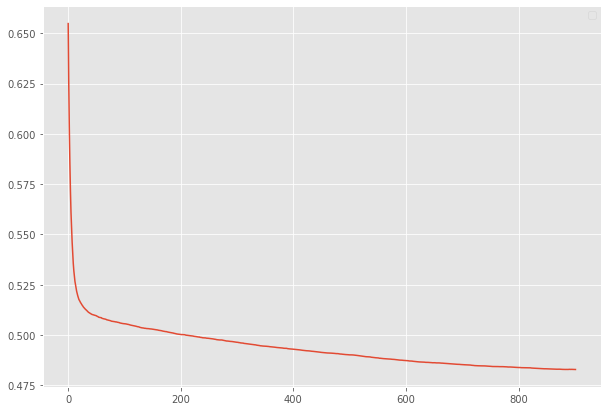

In [6]:
results = bdt.evals_result()

fig = plt.figure(figsize=(10,7))
plt.plot(results['validation_0']['logloss'])
plt.legend()
plt.show()